In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

from transforms3d.taitbryan import euler2quat
from sim import Simulation
from riekf import RIEKF
import numpy as np

P 9 9 < 0, resetting
P 9 9 < 0, resetting
P 9 9 < 0, resetting
P 9 9 < 0, resetting
P 9 9 < 0, resetting
P 9 9 < 0, resetting
P 9 9 < 0, resetting
P 9 9 < 0, resetting
P 9 9 < 0, resetting
P 9 9 < 0, resetting
P 9 9 < 0, resetting


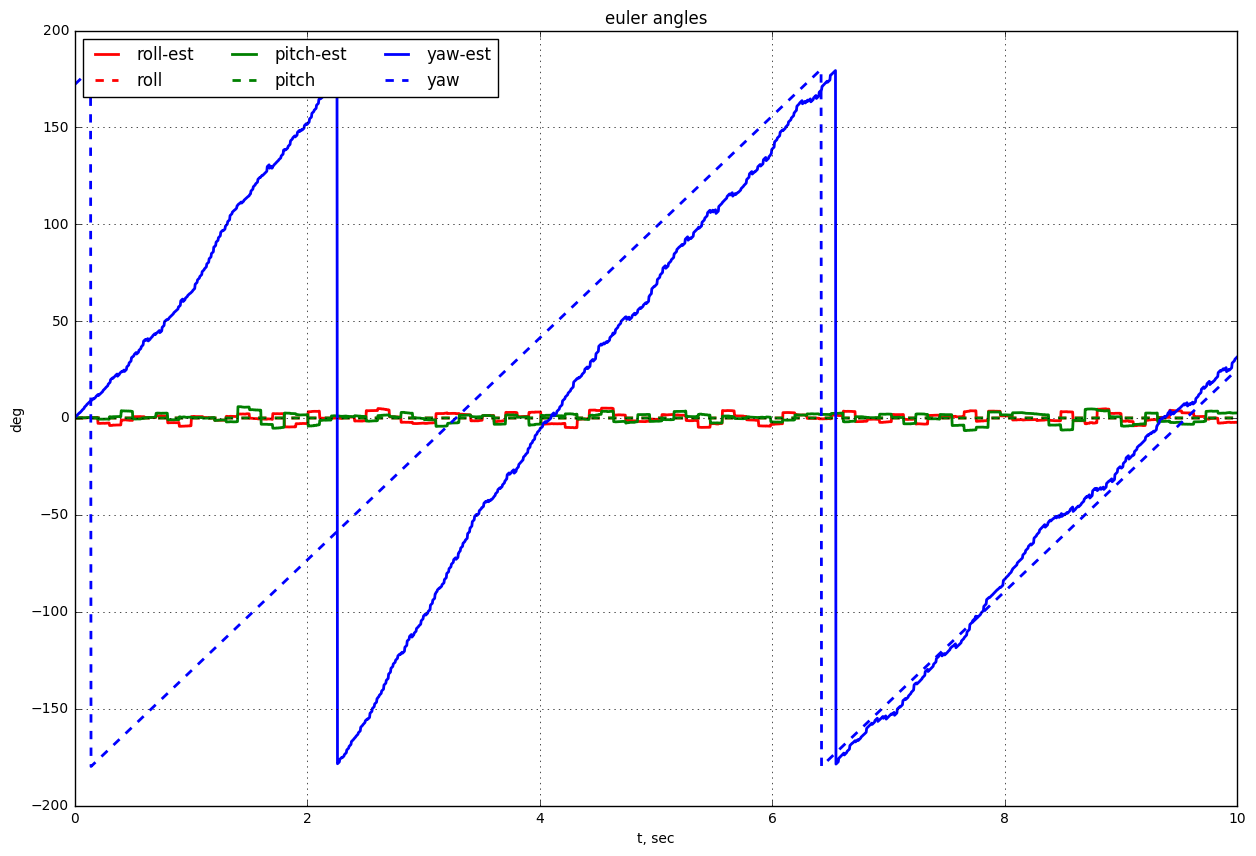

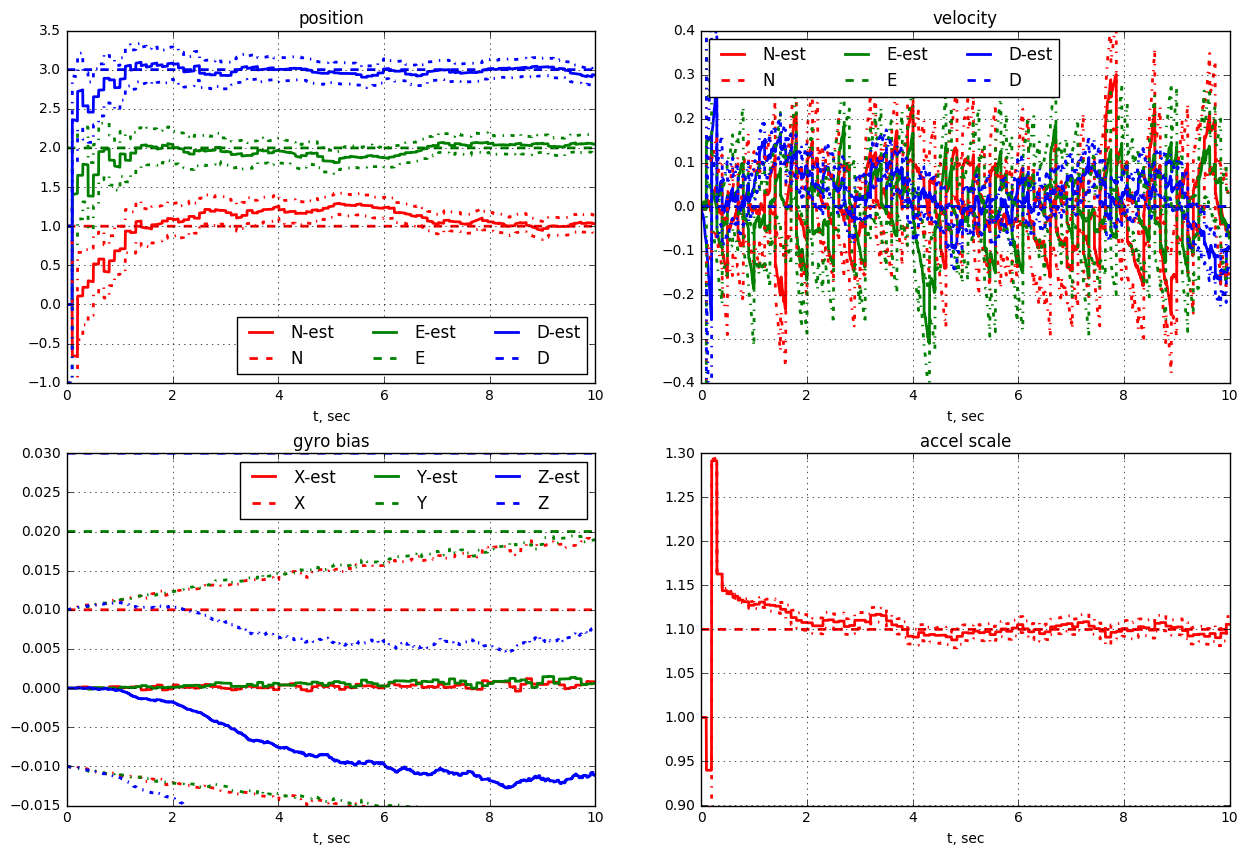

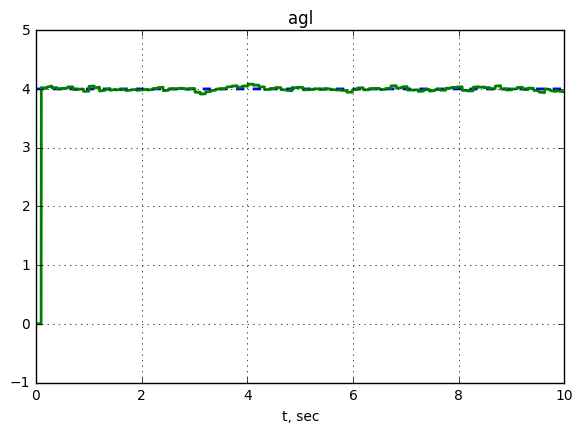

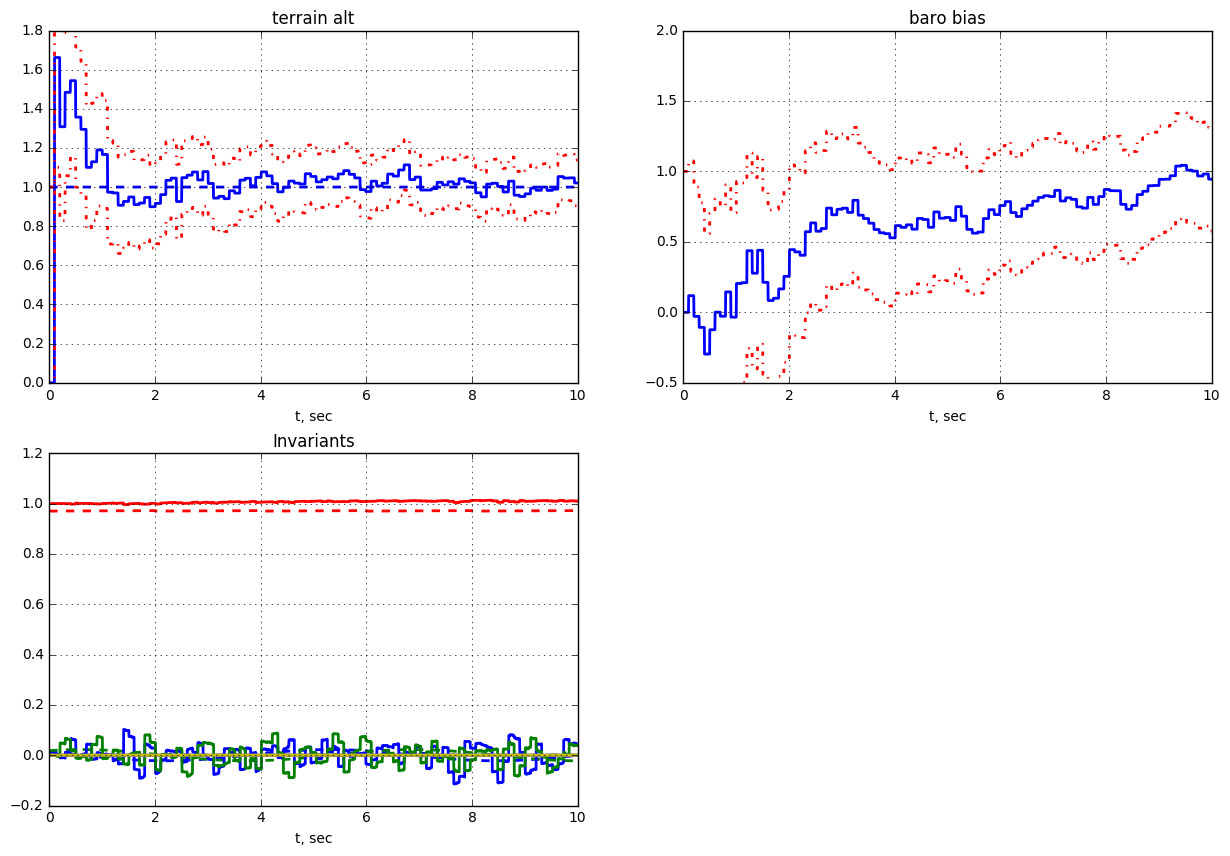

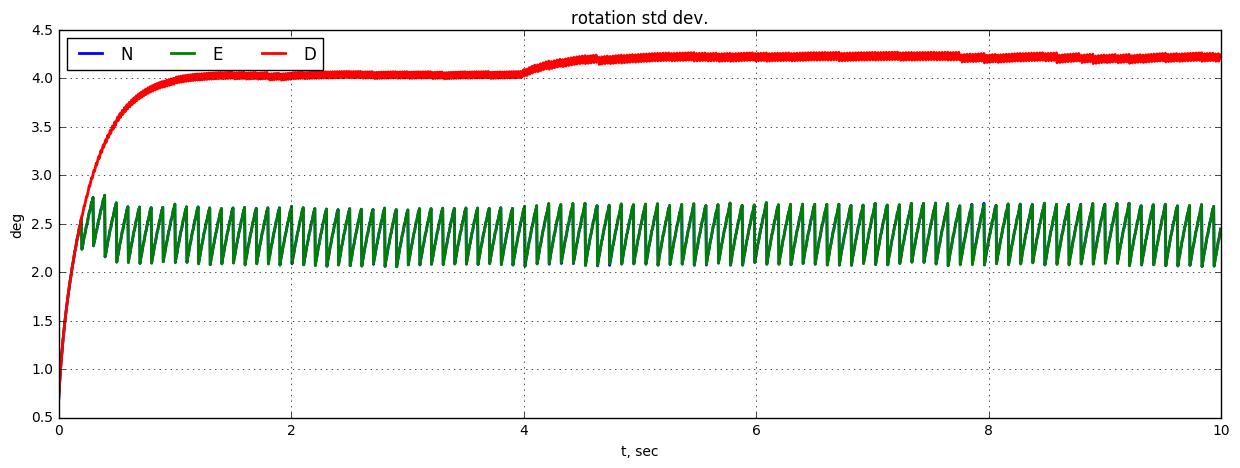

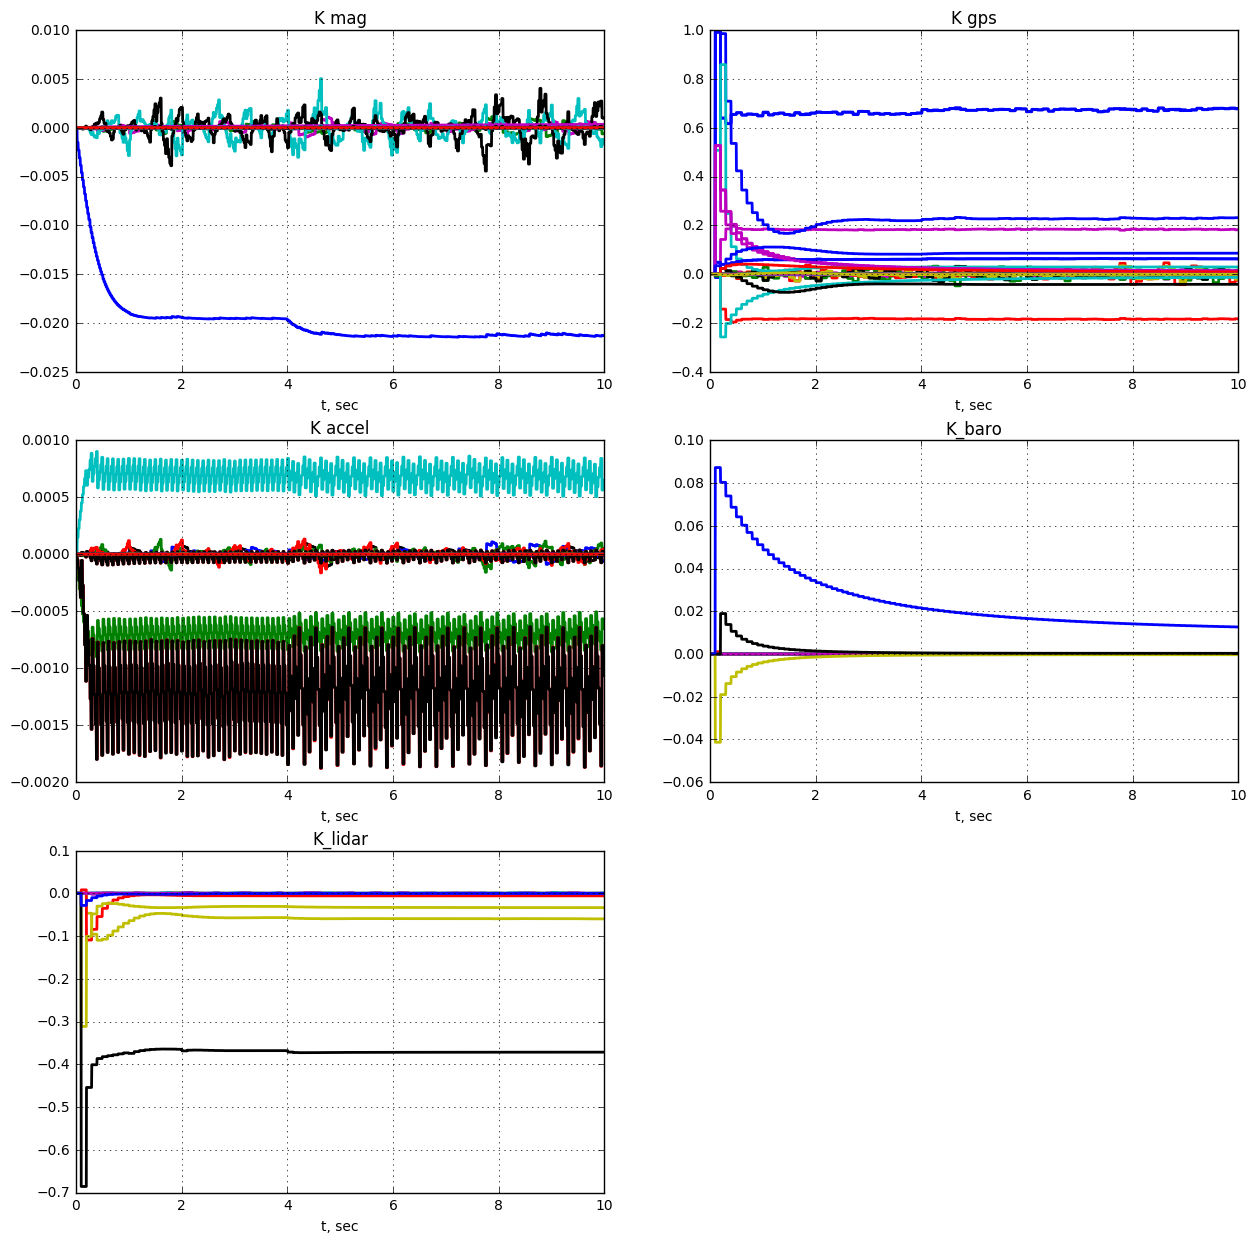

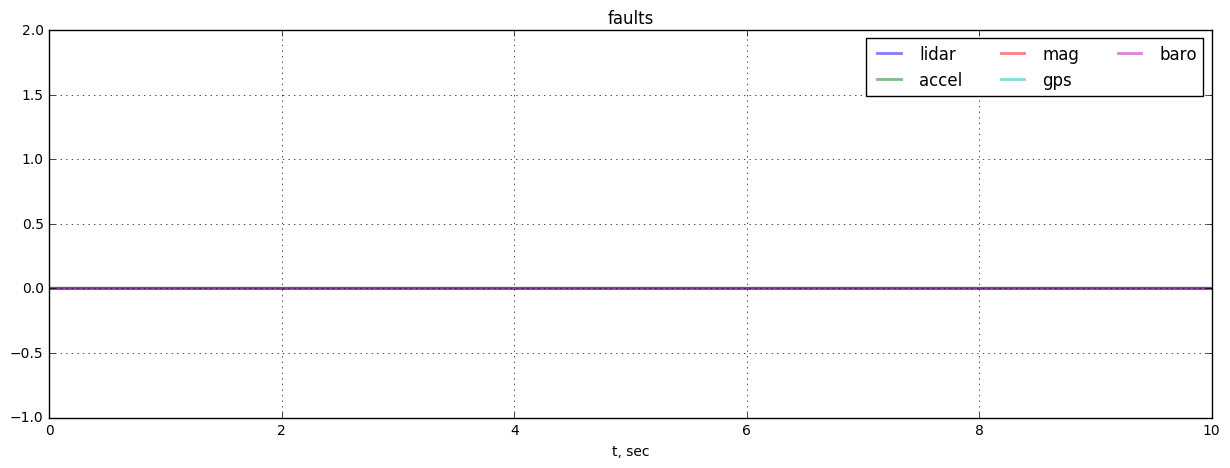

In [2]:
omega_nb_b = [0, 0, 1]
a_b = [0, 0, 0]

# Estimator setup
P0 = np.diag([
    1e-2, 1e-2, 1e-2,  # rot
    1, 1, 1,  # vel
    1e-2, 1e-2, 1e-2,  # gyro bias
    1,  # accel scale
    1, 1, 1,  # position
    1,  # terrain
    1,  # baro bias
    ])**2
Q = np.diag([
    1e-1, 1e-1, 1e-1,  # rot
    1e-2, 1e-2, 1e-2,  # vel
    5e-3, 5e-3, 5e-3,  # gyro bias
    1e-2,  # accel scale
    1e-2, 1e-2, 1e-2,  # position
    1e-1,  # terrain
    1e-1,  # baro bias
    ])**2

q0 = euler2quat(3, 0, 0)
x0 = [
    q0[0], q0[1], q0[2], q0[3],  # attitude
    0, 0, 0,  # velocity
    0.01, 0.02, 0.03,  # gyro bias
    1.1,  # accel scale
    1.0, 2.0, 3.0,  # position
    1.0,  # terrain alittude
    2.0,  # baro bias
    ]
qh0 = euler2quat(0, 0, 0)
xh0 = [
    qh0[0], qh0[1], qh0[2], qh0[3],  # attitude
    0, 0, 0,  # velocity
    0, 0, 0,  # gyro bias
    1.0,  # accel scale
    0, 0, 0,  # position
    0,  # terrain alittude
    0,  # baro bias
    ]

riekf = RIEKF(xh0, P0, Q)
riekf.set_mag_field(0.0, 0)

# Simulation
sim = Simulation()
sim.set_mag_field(1.0, 0)

dt = 1.0/250
dt_est = 1.0/50
tf = 10

data_riekf = sim.simulate(
    omega_nb_b=omega_nb_b, a_b=a_b, x0=x0, est=riekf,
    dt=dt, dt_est=dt_est, tf=tf)
data_riekf.analysis()
plt.show()